In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import *
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import roc_auc_score, roc_curve

In [14]:
def lr(X,y,split_ratio=0.3):
    lr = LogisticRegression(solver='liblinear', C=1000.0, random_state=0)
    if bool(split_ratio):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=0)
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        X_all_std = sc.transform(X)
        lr.fit(X_train_std, y_train)
        train = lr.predict_proba(X_train_std)
        test = lr.predict_proba(X_test_std)
        all_ = lr.predict_proba(X_all_std)
        return train, test, all_, y_train, y_test, y
    else:
        sc = StandardScaler()
        sc.fit(X)
        X_all_std = sc.transform(X)
        lr.fit(X_all_std, y)
        all_ = lr.predict_proba(X_all_std)
        return all_, y

In [15]:
def confusion_mat(probs, y):
    pred = np.argmax(probs, axis=1)
    pred_array = np.zeros((2, 2))
    for i in range(len(y)):
        pred_array[pred[i], y[i]] += 1
    labels = ['Responder', 'Non-respopnder']
    
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(pred_array, cmap='YlGn')
    #axins = inset_axes(ax,
                   #width="5%",
                   #height="50%",
                   #loc='lower left',
                   #bbox_to_anchor=(1.05, 0., 1, 1),
                   #bbox_transform=ax.transAxes,
                   #borderpad=0)
    #plt.colorbar(im, cax=axins)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, fontsize=25)
    ax.set_yticklabels(labels, fontsize=25)
    ax.set_ylabel('Predicted labels', fontsize=25)
    ax.set_xlabel('True labels', fontsize=25)
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, pred_array[i, j],
                           ha="center", va="center", color="k", fontsize=35)

    fig.tight_layout()
    plt.show()

In [16]:
def roc(x, labels, filename):
    y = np.zeros(labels.shape[0])
    y[np.where(labels==0)] = 1
    fpr, tpr, _ = roc_curve(y, x[:,0])
    auc = roc_auc_score(y, x[:,0])
    index = np.argmax(tpr-fpr)
    sen = tpr[index]
    spe = 1-fpr[index]
    fig = plt.figure(figsize=(7,7))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=2*lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity', fontsize=25)
    plt.ylabel('Sensitivity', fontsize=25)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    #plt.title('Responders vs Non-respopnders', fontsize=25)
    plt.text(0.5, 0.3, 'AUC = %0.3f\nSEN = %0.3f\nSPE = %0.3f' % (auc, sen, spe), fontsize=20)
    #plt.legend(loc="lower right", fontsize=20)
    plt.tight_layout()
    plt.show()
    fig.savefig(f'ito/{filename}.jpg')

In [17]:
path = sys.path[0]
datafile = path + '/' + 'Data_ito.xlsx'
data_ori = pd.read_excel(datafile)

In [18]:
data_ori

,ID,Response,cancer,PD-L1 Max FC,PD-L1 Max FC ELISA,PD-L1+ exosomal miR-21 Min FC,PD-L1+ exosomal miR-21 Min FC qPCR,PD-L1 Max LFC,PD-L1 Max LFC ELISA,PD-L1+ exosomal miR-21 Min LFC,PD-L1+ exosomal miR-21 Min LFC qPCR,PD-L1,PD-L1 ELISA,PD-L1+ exosomal miR-21,PD-L1+ exosomal miR-21 qPCR
0,3RW,1,Lung cancer,1.290312,1.035809,0.205128,0.976032,0.367720,0.064031,-2.285402,-0.035,1.142290,13.180963,0.625000,2.950
1,8KT,1,Lung cancer,2.618908,0.925874,0.157509,1.006956,1.388966,-0.090629,-2.666492,0.010,1.642209,383.805208,0.362791,2.965
2,9PA,1,Lung cancer,2.720154,1.025653,0.921037,0.747425,1.443688,0.054958,-0.118669,-0.420,1.206067,9.766393,0.151376,2.450
3,11BH,1,Lung cancer,3.466362,2.135704,0.116883,0.424842,1.793422,1.093957,-3.096862,-1.235,0.634916,19.852547,0.388889,2.885
4,12MP,1,Lung cancer,3.308205,1.024835,0.605499,0.765779,1.726049,0.029154,-0.723803,-0.385,1.980435,247.804998,1.040808,2.060
5,1MW,0,Lung cancer,0.445978,1.029528,8.258495,0.787308,-1.164957,0.034235,3.045879,-0.345,10.076731,368.386165,0.270248,2.450
6,2MH,0,Lung cancer,1.339852,0.872745,2.704165,0.354781,0.422073,-1.243003,1.435183,-1.495,1.583474,4.914193,0.190244,3.460
7,4PH,0,Lung cancer,0.814035,0.857196,0.511624,1.144724,-0.296837,-0.181749,-0.966845,0.195,6.378400,359.795971,0.816832,2.595
8,5SF,0,Lung cancer,0.564267,0.668722,0.808381,1.035265,-0.825549,-0.580570,-0.306893,0.050,2.368728,34.623984,0.815920,2.185
9,10CB,0,Lung cancer,2.325156,1.092130,3.041931,1.879045,1.217328,0.106680,1.604987,0.910,1.542614,145.962868,0.677273,2.055


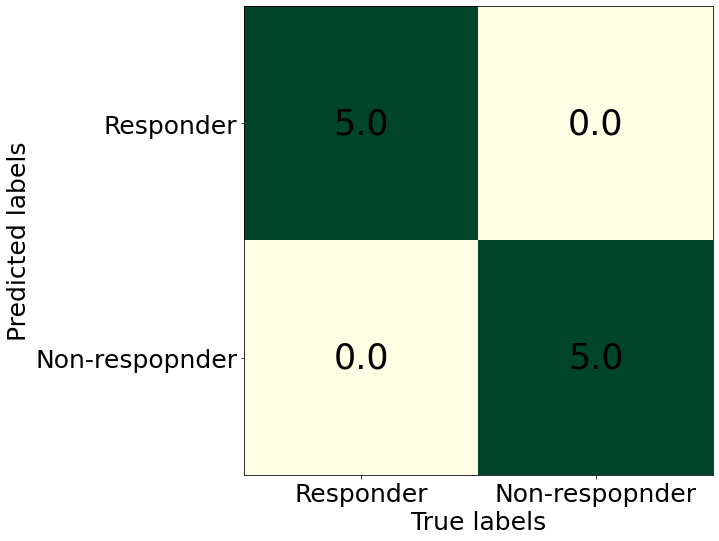

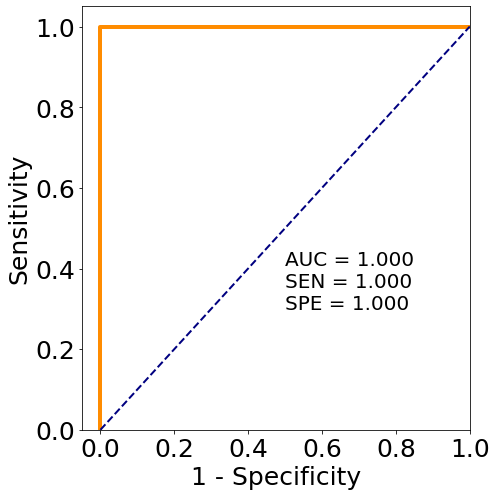

In [23]:
X = np.array(data_ori.loc[:, ['PD-L1 Max FC', 'PD-L1+ exosomal miR-21 Min FC']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1 Max FC', 'PD-L1+ exosomal miR-21 Min FC'])
roc(all_,y,filename)


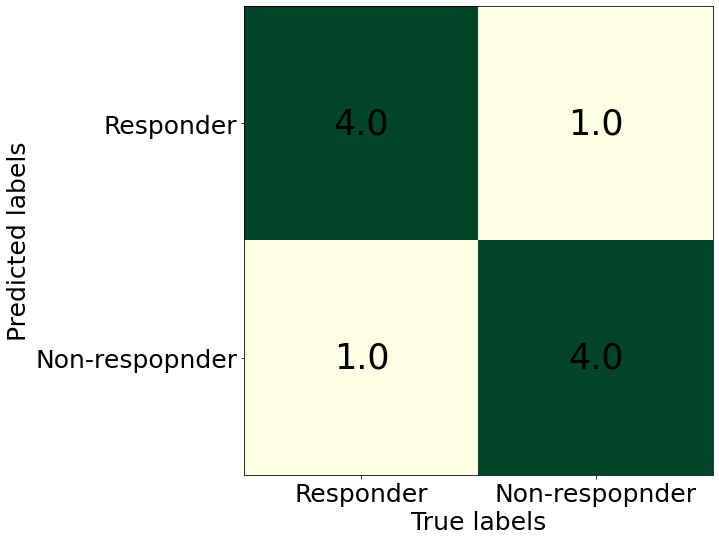

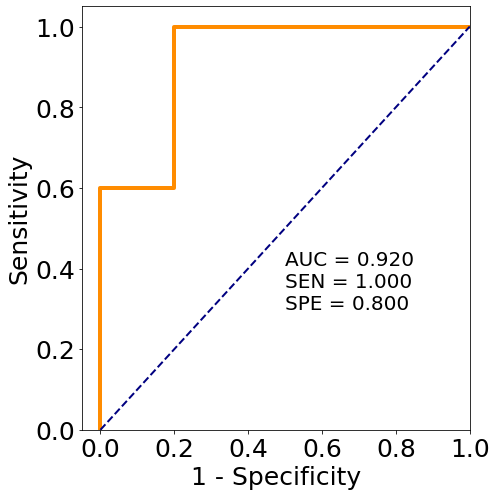

In [24]:
X = np.array(data_ori.loc[:, ['PD-L1 Max FC']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1 Max FC'])
roc(all_,y,filename)

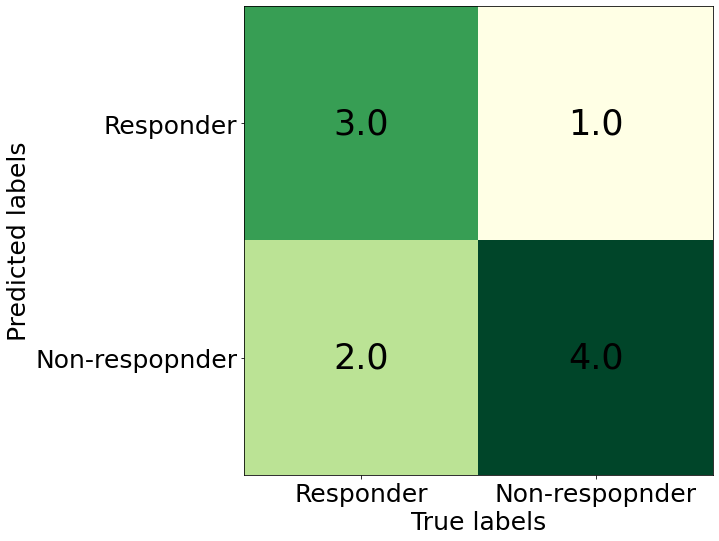

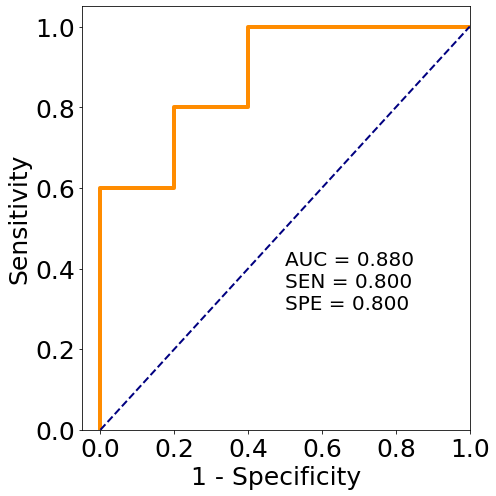

In [25]:
X = np.array(data_ori.loc[:, ['PD-L1+ exosomal miR-21 Min FC']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1+ exosomal miR-21 Min FC'])
roc(all_,y,filename)

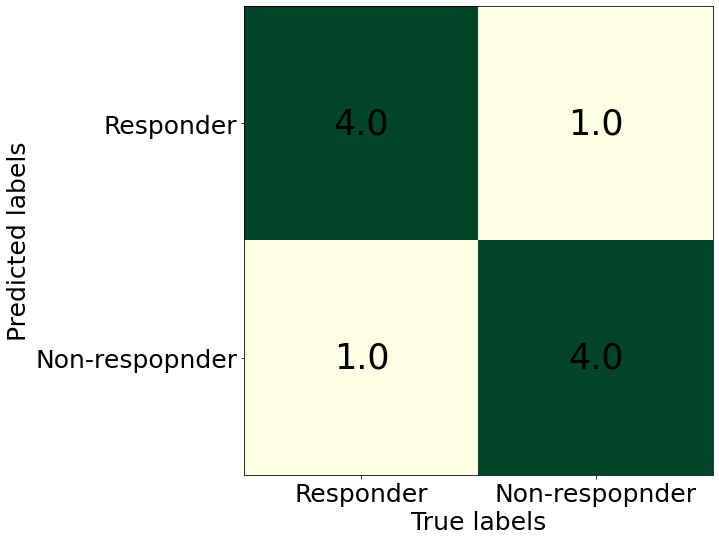

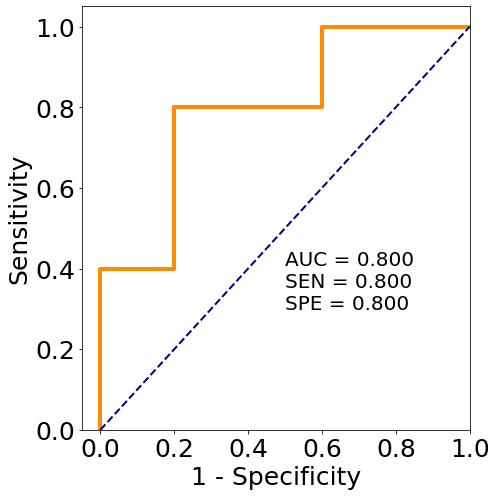

In [26]:
X = np.array(data_ori.loc[:, ['PD-L1 Max FC ELISA', 'PD-L1+ exosomal miR-21 Min FC qPCR']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1 Max FC ELISA', 'PD-L1+ exosomal miR-21 Min FC qPCR'])
roc(all_,y,filename)

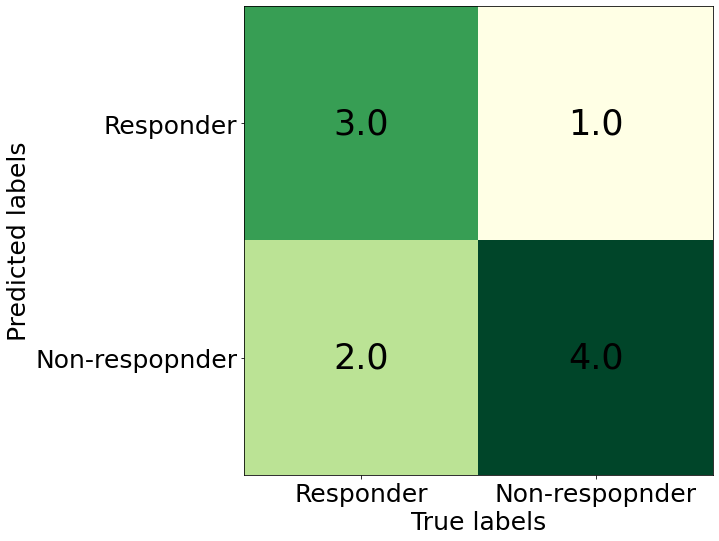

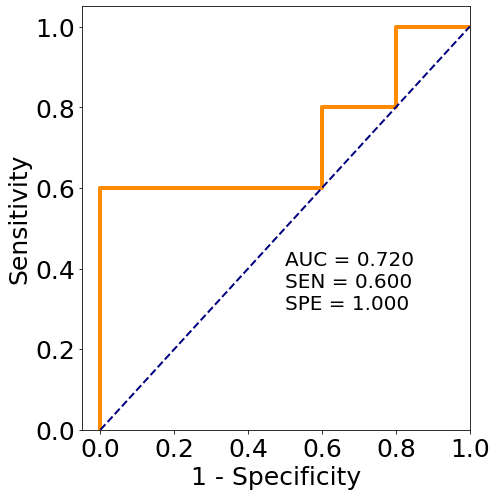

In [27]:
X = np.array(data_ori.loc[:, ['PD-L1 Max FC ELISA']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1 Max FC ELISA'])
roc(all_,y,filename)

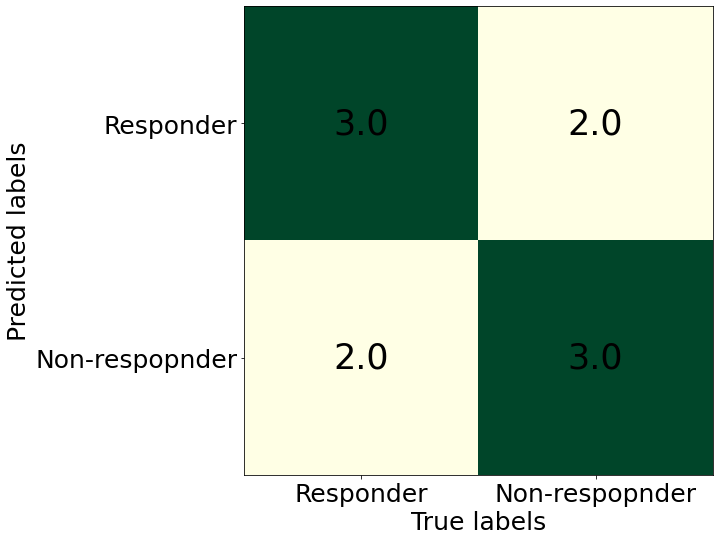

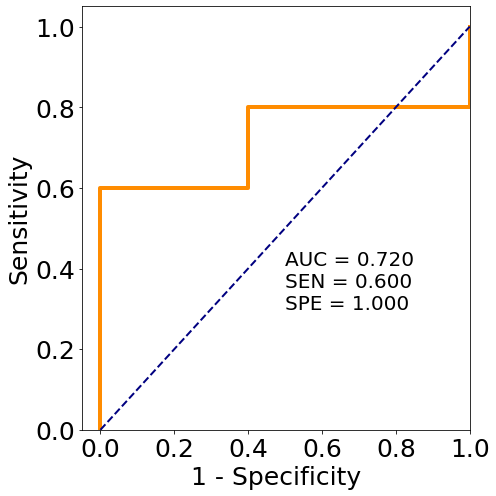

In [28]:
X = np.array(data_ori.loc[:, ['PD-L1+ exosomal miR-21 Min FC qPCR']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1+ exosomal miR-21 Min FC qPCR'])
roc(all_,y,filename)

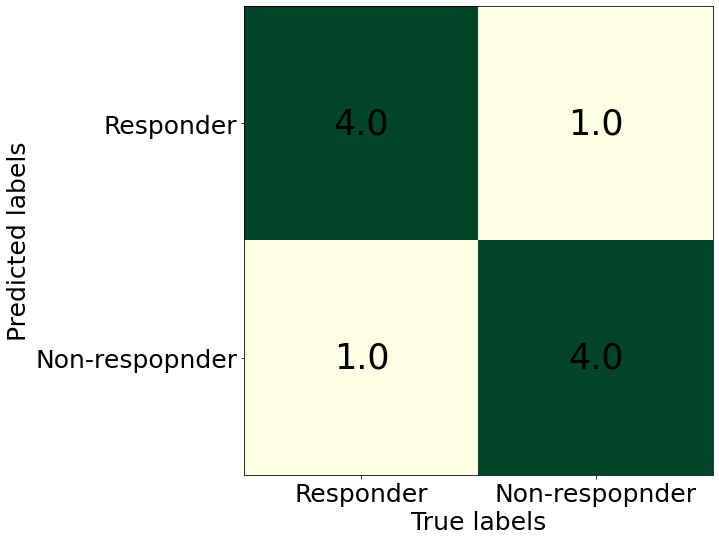

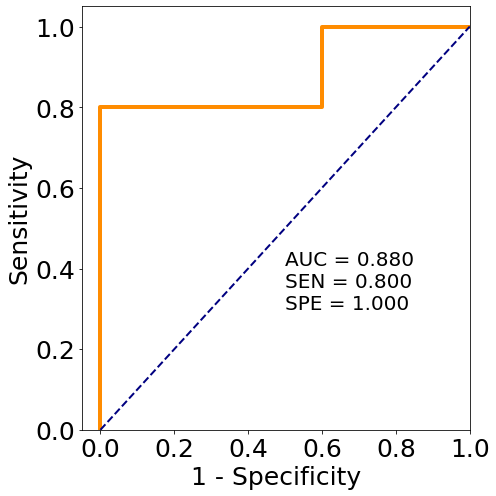

In [29]:
X = np.array(data_ori.loc[:, ['PD-L1', 'PD-L1+ exosomal miR-21']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1', 'PD-L1+ exosomal miR-21'])
roc(all_,y,filename)


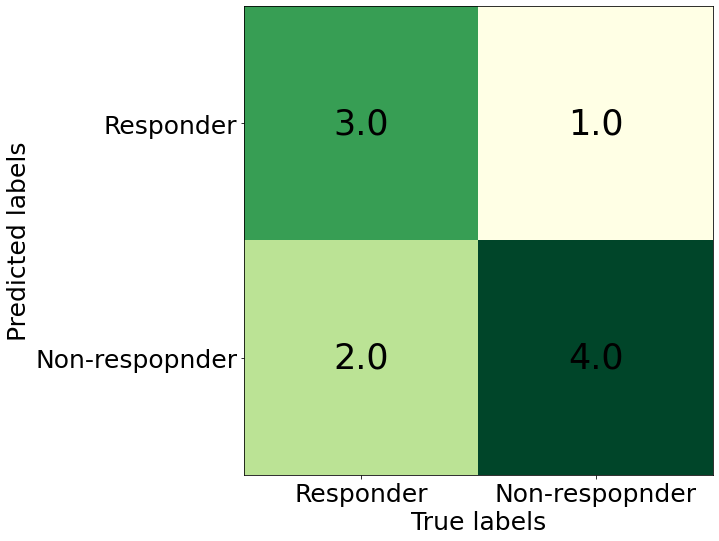

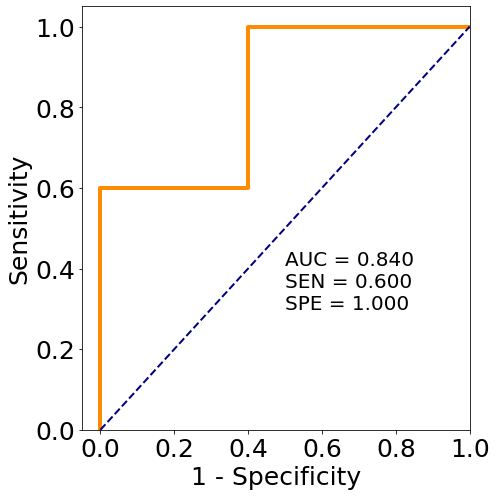

In [30]:
X = np.array(data_ori.loc[:, ['PD-L1']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1'])
roc(all_,y,filename)

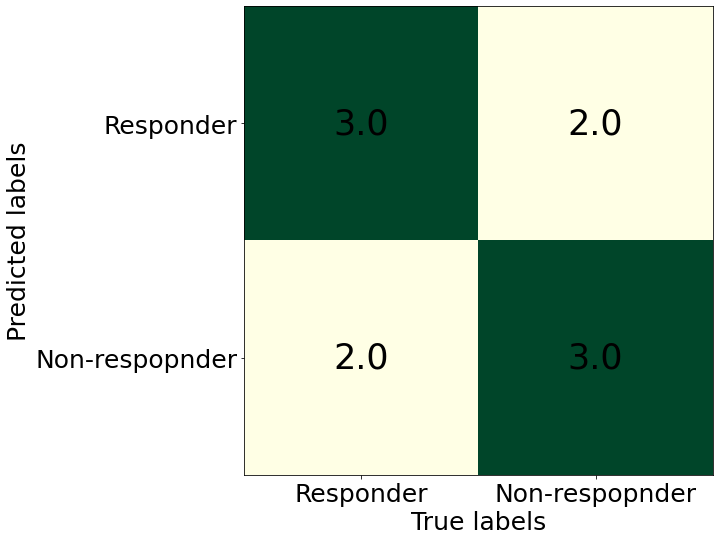

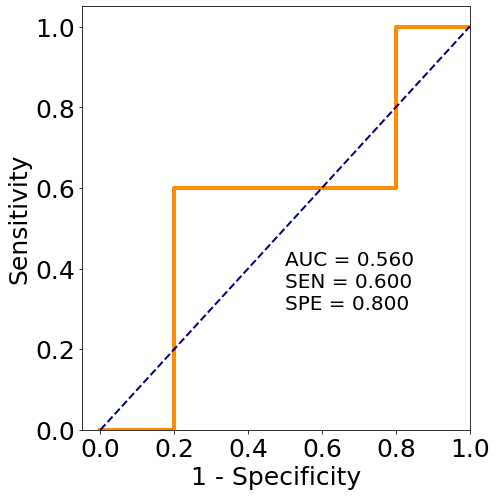

In [31]:
X = np.array(data_ori.loc[:, ['PD-L1+ exosomal miR-21']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1+ exosomal miR-21'])
roc(all_,y,filename)

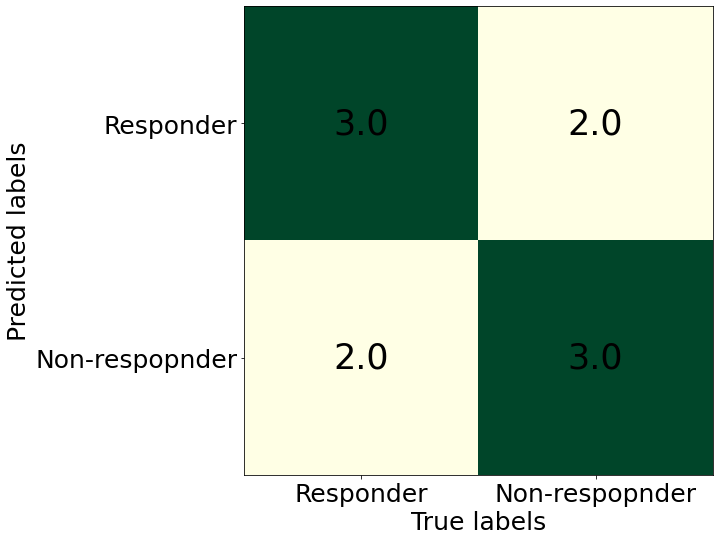

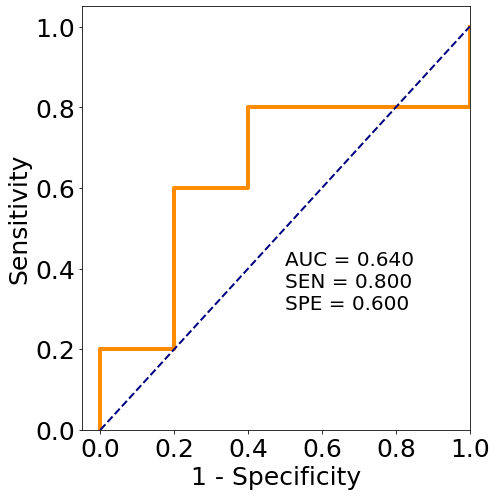

In [33]:
X = np.array(data_ori.loc[:, ['PD-L1 ELISA', 'PD-L1+ exosomal miR-21 qPCR']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1 ELISA', 'PD-L1+ exosomal miR-21 qPCR'])
roc(all_,y,filename)

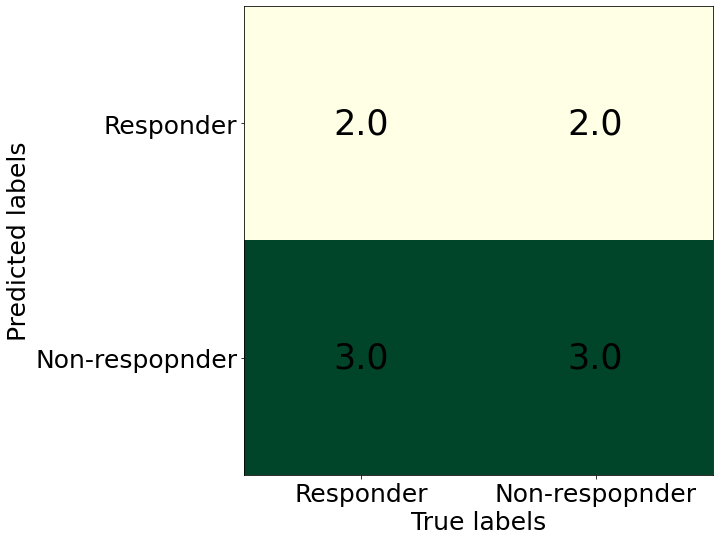

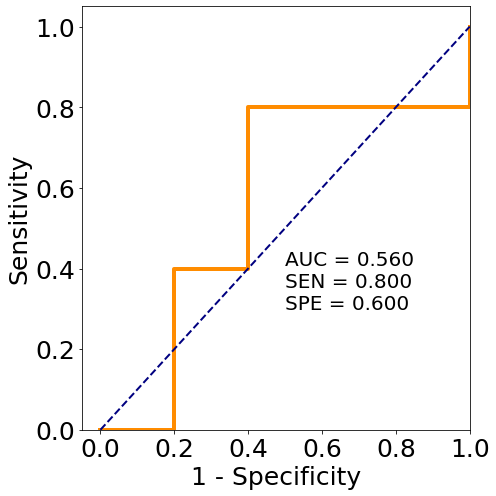

In [34]:
X = np.array(data_ori.loc[:, ['PD-L1 ELISA']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1 ELISA'])
roc(all_,y,filename)

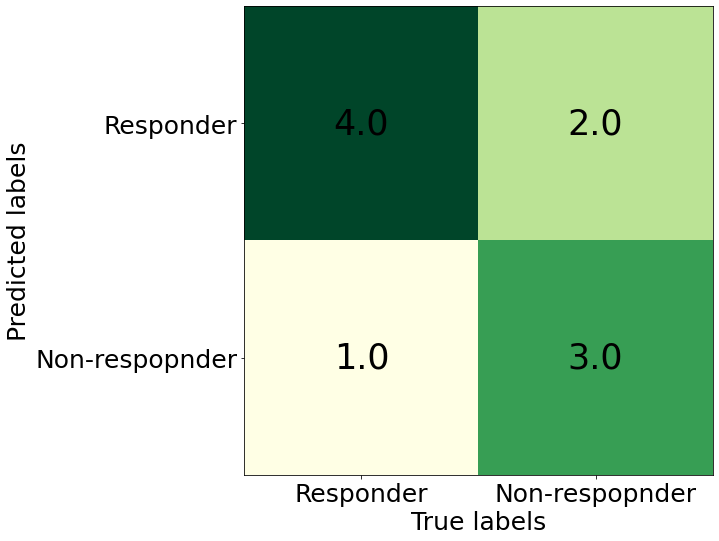

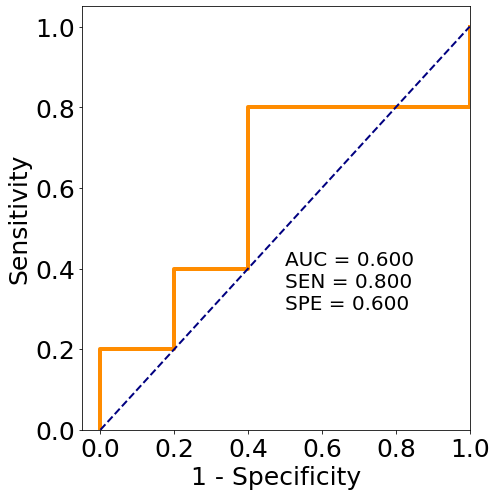

In [35]:
X = np.array(data_ori.loc[:, ['PD-L1+ exosomal miR-21 qPCR']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
filename = '_'.join(['PD-L1+ exosomal miR-21 qPCR'])
roc(all_,y,filename)

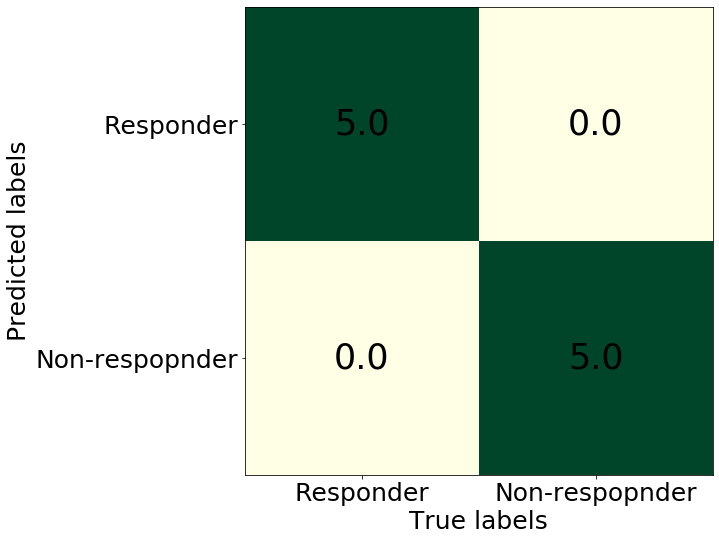

TypeError: roc() missing 1 required positional argument: 'filename'

In [56]:
X = np.array(data_ori.loc[:, ['PD-L1 Max LFC', 'PD-L1+ exosomal miR-21 Min LFC']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
roc(all_,y)

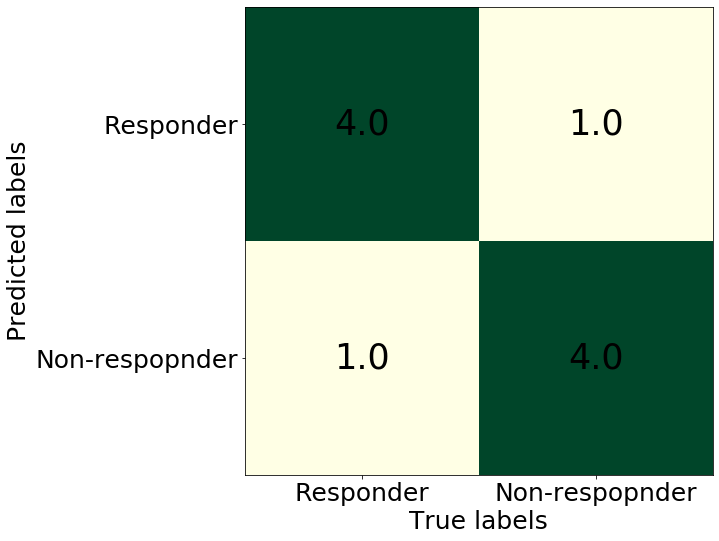

TypeError: roc() missing 1 required positional argument: 'filename'

In [57]:
X = np.array(data_ori.loc[:, ['PD-L1 Max LFC']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
roc(all_,y)

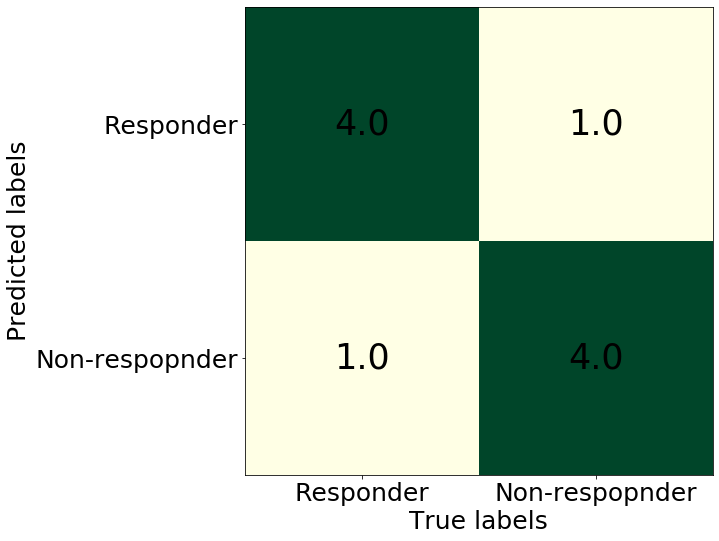

TypeError: roc() missing 1 required positional argument: 'filename'

In [58]:
X = np.array(data_ori.loc[:, ['PD-L1+ exosomal miR-21 Min LFC']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
roc(all_,y)

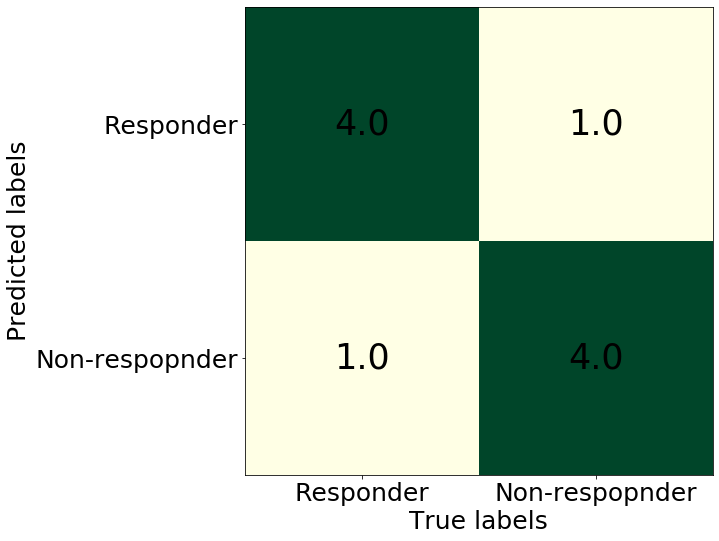

TypeError: roc() missing 1 required positional argument: 'filename'

In [59]:
X = np.array(data_ori.loc[:, ['PD-L1 Max LFC ELISA', 'PD-L1+ exosomal miR-21 Min LFC qPCR']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
roc(all_,y)

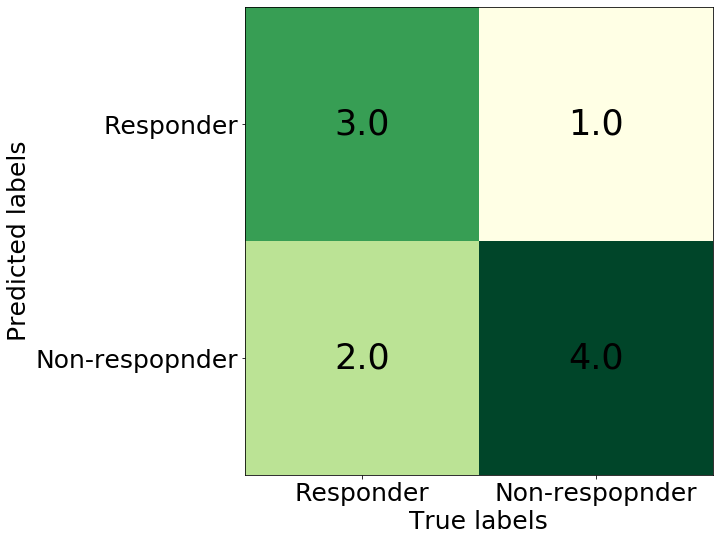

TypeError: roc() missing 1 required positional argument: 'filename'

In [60]:
X = np.array(data_ori.loc[:, ['PD-L1 Max LFC ELISA']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
roc(all_,y)

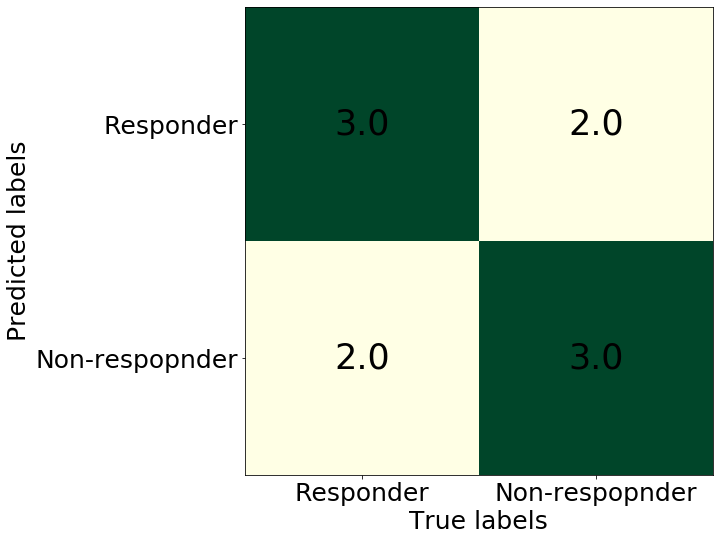

TypeError: roc() missing 1 required positional argument: 'filename'

In [61]:
X = np.array(data_ori.loc[:, ['PD-L1+ exosomal miR-21 Min LFC qPCR']])
y = np.array(data_ori['Response']!=0).astype('int')
all_, y = lr(X, y, split_ratio=0)
confusion_mat(all_, y)
roc(all_,y)